# Chapter 4: Sources of Data

Since our society entered a so-called information era, we have been engulfed by
a huge amount of information or data. For this very reason, there is an increasing
demand for persons armed with data handling skills, such as data scientists or
graduates from business analytics programs. 

Obviously, there are a variety of sources we can pull financial data from.

This section is just to ensure the commit system works.

In [1]:
# Import pandas datareader

import pandas_datareader as pddata
help(pddata.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [2]:
# We've downloaded a file from yahoo finance. Access it.
import pandas as pd 
x = pd.read_csv('/opt/code/test_repo/Python-For-Finance-2nd-Edition/Files/IBM.csv')
x.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,149.979996,153.210007,137.199997,140.889999,134.223740,86424100
2023-01-01,141.100006,147.179993,132.979996,134.729996,128.355209,105575000
2023-02-01,134.490005,137.389999,128.860001,129.300003,123.182137,76080200
2023-03-01,128.899994,131.479996,121.709999,131.089996,126.421463,138239000
2023-04-01,130.970001,132.610001,124.559998,126.410004,121.908134,83679400
2023-05-01,126.349998,130.070007,120.550003,128.589996,124.010490,96207800
2023-06-01,128.440002,139.470001,127.779999,133.809998,130.804184,100711500
2023-07-01,133.419998,144.600006,131.550003,144.179993,140.941238,85773900
2023-08-01,144.250000,147.729996,139.759995,146.830002,143.531723,84268400


In [3]:
# We could do the same by simply pulling data directly from the source using datareader
import pandas_datareader.data as web 
import datetime

# We can specify a range
begdate = datetime.datetime(1962, 11, 1)
enddate = datetime.datetime(2016, 11, 7)

# Note that datareader doesn't work for yahoo anymore as of 2022

df = pddata.DataReader('IBM', 'stooq', start = begdate, end = enddate)

In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-07,115.58800,117.18900,115.47100,116.88600,4.990967e+06
2016-11-04,114.41700,115.33500,113.97800,114.43700,3.290830e+06
2016-11-03,114.50500,115.40300,113.93900,114.38800,3.834840e+06
2016-11-02,114.47500,115.12900,113.86000,114.04600,4.095550e+06
2016-11-01,115.24700,115.52000,113.90000,114.68100,4.252056e+06
...,...,...,...,...,...
1962-11-08,3.15369,3.18033,3.10128,3.10128,1.940504e+06
1962-11-07,3.15369,3.19322,3.10792,3.15369,2.659632e+06
1962-11-05,3.13388,3.17370,3.13388,3.15369,2.636802e+06


There are various institutions information can be pulled for. Let's look at some World Bank information.

In [5]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [6]:
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10980,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10982,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10984,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10985,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


WE can also use the "download" function to acquire data directly from the WB's servers.

In [7]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2010)
dat

NY.GDP.PCAP.KD
country       year                
Canada        2010    41156.145186
              2009    40368.931509
              2008    42063.240117
              2007    42098.431220
              2006    41646.414637
              2005    40989.526824
Mexico        2010     9480.135305
              2009     9151.769566
              2008     9888.139443
              2007     9920.687840
              2006     9847.512821
              2005     9524.742436
United States 2010    52963.464170
              2009    51996.183495
              2008    53854.160612
              2007    54299.617241
              2006    53738.091725
              2005    52789.731419

In [8]:
# Since this code is in a formatted dataframe with a hierarchical index, using the "groupby" transformation is straightforwards to it.

# Group by level 0 = country, in this case
dat['NY.GDP.PCAP.KD'].groupby(level = 0).mean()

# Group by level 1 = year, in this case
dat['NY.GDP.PCAP.KD'].groupby(level = 1).mean()

year
2005    34434.666893
2006    35077.339728
2007    35439.578767
2008    35268.513391
2009    33838.961523
2010    34533.248220
Name: NY.GDP.PCAP.KD, dtype: float64

Suppose we want to compare GDP to the share of people with cellphone contracts around the world.

In [9]:
wb.search('cell.*%').iloc[:,:2]

,id,name
8535,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%)
8590,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...


In [10]:
ind = ['NY.GDP.PCAP.KD','IT.MOB.COV.ZS']
dat = wb.download(indicator = ind, country = 'all', start = 2011, end = 2011)
dat

,,NY.GDP.PCAP.KD,IT.MOB.COV.ZS
country,year,,
Africa Eastern and Southern,2011,1540.053935,NaN
Africa Western and Central,2011,1727.676025,NaN
Arab World,2011,6027.427601,NaN
Caribbean small states,2011,10003.078637,NaN
Central Europe and the Baltics,2011,11394.266803,NaN
...,...,...,...
Togo,2011,NaN,NaN
Tunisia,2011,NaN,100.0
Uganda,2011,NaN,100.0


In [11]:
dat.columns = ['gdp','cellphone']
print(dat.tail())

               gdp  cellphone
country  year                
Togo     2011  NaN        NaN
Tunisia  2011  NaN      100.0
Uganda   2011  NaN      100.0
Zambia   2011  NaN       62.0
Zimbabwe 2011  NaN       72.4


In [12]:
# We can use statsmodels package to assess the relationship between our two variables using ordinary least squares regression.
# Obviously richer nations have higher cell phone usage
import numpy as np 
import statsmodels.formula.api as smf 
# mod = smf.ols('cellphone ~ np.log(gdp)', dat).fit()
# print(mod.summary())

# There seem to be NAs in the data let's ignore this for now

OECD also provides statistics. You must specify their data set code.

In [13]:

df = web.DataReader('TUD','oecd')
df.columns

MultiIndex([(      'Australia', 'Annual', 'Percentage of employees'),
            (        'Austria', 'Annual', 'Percentage of employees'),
            (        'Belgium', 'Annual', 'Percentage of employees'),
            (         'Canada', 'Annual', 'Percentage of employees'),
            (        'Czechia', 'Annual', 'Percentage of employees'),
            (        'Denmark', 'Annual', 'Percentage of employees'),
            (        'Finland', 'Annual', 'Percentage of employees'),
            (         'France', 'Annual', 'Percentage of employees'),
            (        'Germany', 'Annual', 'Percentage of employees'),
            (         'Greece', 'Annual', 'Percentage of employees'),
            (        'Hungary', 'Annual', 'Percentage of employees'),
            (        'Iceland', 'Annual', 'Percentage of employees'),
            (        'Ireland', 'Annual', 'Percentage of employees'),
            (          'Italy', 'Annual', 'Percentage of employees'),
            (       

## Using Google and Yahoo

Back to the earlier discussion - as seen, there are a variety of sources that can be used to pull financial information. We can use this info for purposes such as calculating returns.

In [14]:
begdate= datetime.datetime(2015,1,1)
enddate= datetime.datetime(2015,11,9)
ticker = 'IBM'
p = pddata.DataReader(ticker, 'stooq', start = begdate, end = enddate)

ret = p['Close'].pct_change()

In [15]:
p['Returns'] = ret 
p

,Open,High,Low,Close,Volume,Returns
Date,,,,,,
2015-11-09,100.637,100.754,98.4217,98.7438,1.106726e+07,NaN
2015-11-06,101.115,101.818,100.6070,100.8910,6.502687e+06,0.021745
2015-11-05,102.355,102.931,100.9590,101.1060,7.050473e+06,0.002131
2015-11-04,103.028,103.116,102.1500,102.3740,4.864960e+06,0.012541
2015-11-03,101.222,103.213,101.1150,102.5590,6.016591e+06,0.001807
...,...,...,...,...,...,...
2015-01-08,110.387,112.377,109.9090,111.9280,6.001319e+06,-0.004438
2015-01-07,111.050,111.050,108.8540,109.5670,6.653528e+06,-0.021094
2015-01-06,112.836,113.041,109.6350,110.2690,8.698870e+06,0.006407


In [16]:
# The mean daily return is shown below
p.Close[1:]/p.Close[:-1]-1
mean = np.mean(ret)
print("The mean return is: ", round(mean,5))

The mean return is:  0.00079


In [17]:
# Is this statistically different from 0?
from scipy import stats

print('T-test result: T-value and P-value' )
print(stats.ttest_1samp(ret,0))

T-test result: T-value and P-value
TtestResult(statistic=nan, pvalue=nan, df=nan)


Let's see if the returns between Microsoft and IBM were independent of one another.

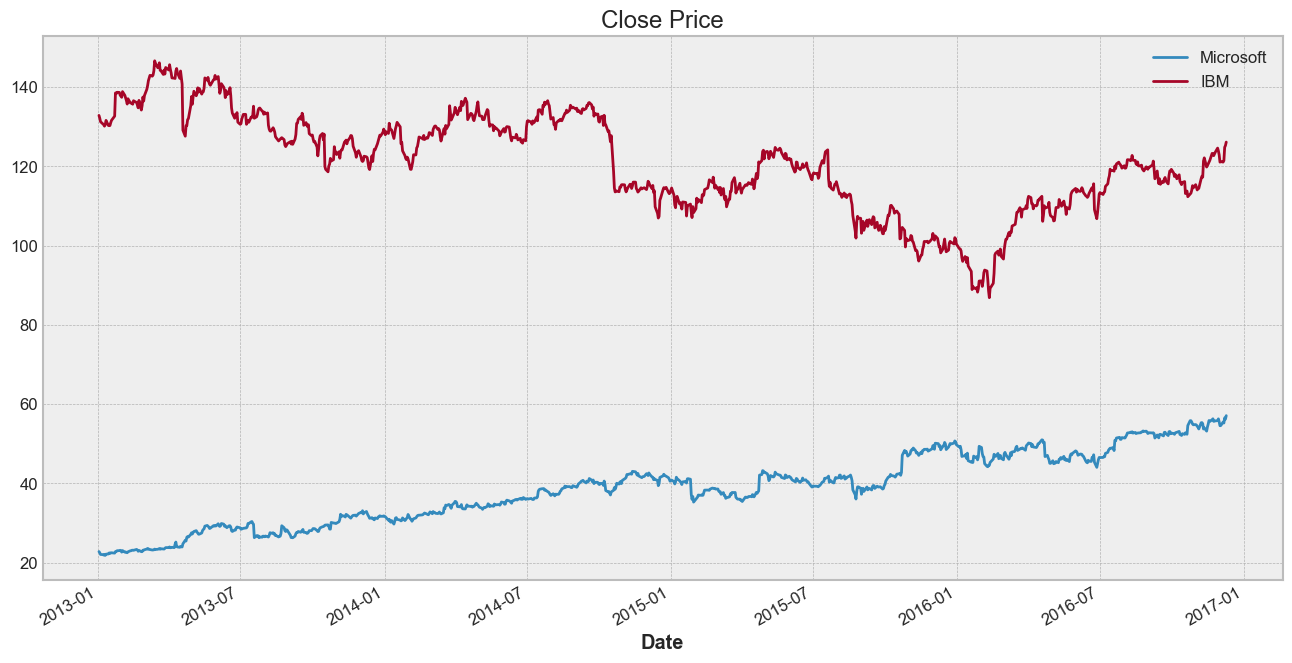

In [59]:
import matplotlib.pyplot as plt

begdate = datetime.datetime(2013,1,1)
enddate = datetime.datetime(2016,12,9)

def ret_f(ticker, beg, end):
    p = pddata.DataReader(ticker, 'stooq', start = beg, end = end)
    p = p.iloc[::-1]
    ret= p['Close'].pct_change()
    return ret

a = ret_f('IBM', begdate, enddate)
b = ret_f('MSFT',begdate, enddate)

MSFT = pddata.DataReader('MSFT', 'stooq', start = begdate, end = enddate) 
IBM = pddata.DataReader('IBM', 'stooq', start = begdate, end = enddate) 
ret = p['Close'].pct_change()
MSFT['Close'].plot(label='Microsoft',figsize=(16,8),title='Close Price')
IBM['Close'].plot(label='IBM',figsize=(16,8),title='Close Price')
plt.legend()


In [61]:
# The means are displayed below
print("Mean return of IBM:  ", a.mean())
print('Mean return of MSFT: ', b.mean())


Mean return of IBM:   2.207822557959602e-05
Mean return of MSFT:  0.0010397050786318928


In [62]:
# Are they independent of one another?
print(stats.ttest_ind(a,b))

Ttest_indResult(statistic=nan, pvalue=nan)


Preferably, log returns are used over general percentage ones for a variety of reasons. One of these reasons being that the log return of a longer period is a summation of shorter ones. We can convert daily returns to monthly log returns as shown below.

In [63]:
import numpy as np
import pandas as pd
# from matplotlib.finance import quotes_historical_yahoo_ochl as getData ---- this is deprecated

#
ticker='IBM'
begdate= datetime.datetime(2015,1,1)
enddate= datetime.datetime(2015,12,31)
x = pddata.DataReader(ticker, 'stooq', start = begdate, end = enddate) 


In [64]:
x

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,101.466,101.486,100.3730,100.403,4.743742e+06
2015-12-30,101.838,102.472,101.5940,101.682,4.096771e+06
2015-12-29,100.891,102.189,100.8610,102.004,5.404663e+06
2015-12-28,100.491,100.735,99.6222,100.403,4.307907e+06
2015-12-24,101.027,101.340,100.7830,100.891,2.049145e+06
...,...,...,...,...,...
2015-01-08,110.387,112.377,109.9090,111.928,6.001319e+06
2015-01-07,111.050,111.050,108.8540,109.567,6.653528e+06
2015-01-06,112.836,113.041,109.6350,110.269,8.698870e+06


In [65]:
ret = x['Close'].pct_change()
logret = np.log(x['Close'].pct_change())
ret

/Users/Leo/.pyenv/versions/3.10.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Leo/.pyenv/versions/3.10.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date
2015-12-31         NaN
2015-12-30    0.012739
2015-12-29    0.003167
2015-12-28   -0.015695
2015-12-24    0.004860
                ...   
2015-01-08   -0.004438
2015-01-07   -0.021094
2015-01-06    0.006407
2015-01-05    0.022128
2015-01-02    0.016281
Name: Close, Length: 252, dtype: float64

In [66]:

x['dates'] = pd.to_datetime(x.index)
x['month_year'] = x['dates'].dt.to_period('M')
x

,Open,High,Low,Close,Volume,dates,month_year
Date,,,,,,,
2015-12-31,101.466,101.486,100.3730,100.403,4.743742e+06,2015-12-31,2015-12
2015-12-30,101.838,102.472,101.5940,101.682,4.096771e+06,2015-12-30,2015-12
2015-12-29,100.891,102.189,100.8610,102.004,5.404663e+06,2015-12-29,2015-12
2015-12-28,100.491,100.735,99.6222,100.403,4.307907e+06,2015-12-28,2015-12
2015-12-24,101.027,101.340,100.7830,100.891,2.049145e+06,2015-12-24,2015-12
...,...,...,...,...,...,...,...
2015-01-08,110.387,112.377,109.9090,111.928,6.001319e+06,2015-01-08,2015-01
2015-01-07,111.050,111.050,108.8540,109.567,6.653528e+06,2015-01-07,2015-01
2015-01-06,112.836,113.041,109.6350,110.269,8.698870e+06,2015-01-06,2015-01


In [1]:
returns = x['Close'].pct_change()
logret = np.log(x['Close'].pct_change() + 1)
x['dates']


NameError: name 'x' is not defined

In [68]:
y = pd.DataFrame(logret, x.index)
y.rename(columns={"Close":"Logret"}, inplace= True)
y.set_index(x['dates'].dt.to_period('M'), inplace= True)
y



,Logret
dates,
2015-12,NaN
2015-12,0.012658
2015-12,0.003162
2015-12,-0.015820
2015-12,0.004849
...,...
2015-01,-0.004448
2015-01,-0.021320
2015-01,0.006387


In [69]:
retMonthly = y.groupby(y.index).sum()
retMonthly


,Logret
dates,
2015-01,0.046835
2015-02,-0.043679
2015-03,0.008240
2015-04,-0.087334
2015-05,0.012638
2015-06,0.034083
2015-07,0.035716
2015-08,0.098518
2015-09,-0.006514


### Let's calculate some annual returns.

In [28]:
# Annual returns
ticker='IBM'
begdate=datetime.datetime(1980,1,1)
enddate=datetime.datetime(2012,12,31)

x = pddata.DataReader(ticker, 'stooq', start = begdate, end = enddate) 
x = x.iloc[::-1]

ret = x['Close'].pct_change()
logret = np.log(x['Close'].pct_change())

dates = pd.to_datetime(x.index)
## x['month_year'] = x['dates'].dt.to_period('M')
x.head()

/Users/Leo/.pyenv/versions/3.10.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/Leo/.pyenv/versions/3.10.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open,High,Low,Close,Volume
Date,,,,,
1980-01-02,10.2999,10.5527,10.2238,10.2238,2.508196e+06
1980-01-03,10.2238,10.3858,10.0207,10.3858,3.715413e+06
1980-01-04,10.3858,10.4287,10.2999,10.3702,2.878333e+06
1980-01-07,10.3702,10.3702,10.2433,10.3282,2.154496e+06
1980-01-08,10.3282,11.0367,10.2433,11.0181,4.318719e+06


In [29]:
x.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-24,130.636,131.154,129.934,130.208,2.410428e+06
2012-12-26,130.071,130.998,129.221,129.915,4.102915e+06
2012-12-27,129.603,130.802,129.046,130.393,5.862826e+06
2012-12-28,129.339,130.081,128.470,128.470,5.226009e+06
2012-12-31,127.816,129.709,127.797,129.613,6.923728e+06


In [30]:
returns = x['Close'].pct_change()
logret = np.log(x['Close']/x['Close'].shift(1))
logret

Date
1980-01-02         NaN
1980-01-03    0.015721
1980-01-04   -0.001503
1980-01-07   -0.004058
1980-01-08    0.064661
                ...   
2012-12-24   -0.005224
2012-12-26   -0.002253
2012-12-27    0.003673
2012-12-28   -0.014858
2012-12-31    0.008858
Name: Close, Length: 8323, dtype: float64

In [31]:
y = pd.DataFrame(logret, x.index)
y.rename(columns={"Close":"Logret"}, inplace= True)
y.set_index(dates.to_period('Y'), inplace= True)
y

,Logret
Date,
1980,NaN
1980,0.015721
1980,-0.001503
1980,-0.004058
1980,0.064661
...,...
2012,-0.005224
2012,-0.002253
2012,0.003673


In [32]:
retAnnual = y.groupby(y.index).sum()
retAnnual

,Logret
Date,
1980,0.082416
1981,-0.176644
1982,0.526127
1983,0.237087
1984,0.009201
1985,0.233393
1986,-0.258955
1987,-0.038299
1988,0.053828


In finance we must compare standard deviations and variances between stocks to measure risk. This is done below between Microsoft and IBM.

In [33]:
begdate = datetime.datetime(2013,1,1)
enddate = datetime.datetime(2016,12,9)

def ret_f(ticker, beg, end):
    p = pddata.DataReader(ticker, 'stooq', start = beg, end = end)
    p = p.iloc[::-1]
    ret= p['Close'].pct_change()
    return ret

x = ret_f('IBM', begdate, enddate)
y = ret_f('MSFT',begdate, enddate)

In [34]:
x

Date
2013-01-02         NaN
2013-01-03   -0.005291
2013-01-04   -0.006719
2013-01-07   -0.004236
2013-01-08   -0.001492
                ...   
2016-12-05   -0.001056
2016-12-06    0.003072
2016-12-07    0.027722
2016-12-08    0.003589
2016-12-09    0.006857
Name: Close, Length: 994, dtype: float64

The function called bartlett() contained in scipy.stats is used. The following
output shown suggests that those two companies have different variance since the
F-value is 44.39 while the P-value is almost zero:

In [35]:
# There is a function called bartlett in scipy.stats
import scipy
res = scipy.stats.bartlett(x,y)
print(res)

BartlettResult(statistic=46.368346755727465, pvalue=9.798570421522861e-12)


## Retrieving Data from FRED

The Federal Reserve has many datasets related to current economics and historical
time series. For instance, they have data related to interest rates, such as Euro-dollar
deposit rates. 

In [36]:
import pandas_datareader.data as getData
vix = getData.DataReader("VIXCLS",'fred')
vix.head()

,VIXCLS
DATE,
2019-01-17,18.06
2019-01-18,17.80
2019-01-21,NaN
2019-01-22,20.80
2019-01-23,19.52


## Appendix: Various Graphs and Charts for Practice

### Appendix A – Python program for return distribution versus a normal distribution

In [37]:
from matplotlib.pyplot import *

import numpy as np
import matplotlib.mlab as mlab

ticker='IBM'
begdate=datetime.datetime(2015,1,1)
enddate=datetime.datetime(2015,11,9)

p = pddata.DataReader(ticker, 'stooq', start = begdate, end = enddate) 
p = p.iloc[::-1]


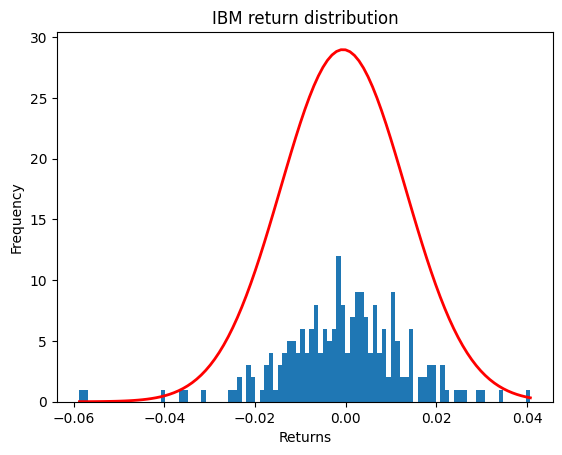

In [38]:
ret = p['Close'].pct_change()

[n,bins, patches] = hist(ret, 100)
mu = np.mean(ret)
sigma = np.std(ret)

# use the norm.pdf function from stats (taken from scipy)
x = stats.norm.pdf(bins, mu, sigma) 
plot(bins, x, color='red', lw=2)
title("IBM return distribution")
xlabel("Returns")
ylabel("Frequency")
show()

### Appendix B – Python program to a draw candle-stick picture

We can use the one finance module we used elsewhere.

In [39]:
import mplfinance as mpf

date1 = datetime.datetime(2013, 10, 20)
date2 = datetime.datetime(2013, 11, 10)
ticker='IBM'

p = pddata.DataReader(ticker, 'stooq', start = date1, end = date2) 
p

,Open,High,Low,Close,Volume
Date,,,,,
2013-11-08,123.366,124.235,122.322,124.167,9.096116e+06
2013-11-07,123.893,125.152,123.893,124.176,7.568193e+06
2013-11-06,122.732,124.001,122.664,123.630,6.611001e+06
2013-11-05,123.162,123.376,121.941,122.059,8.894517e+06
2013-11-04,123.444,124.049,123.044,123.688,5.076478e+06
2013-11-01,123.376,123.747,122.742,122.986,5.311531e+06
2013-10-31,123.913,125.318,123.512,123.650,6.259398e+06
2013-10-30,124.674,125.015,123.406,123.630,7.688903e+06
2013-10-29,121.883,125.113,121.785,124.967,1.298407e+07


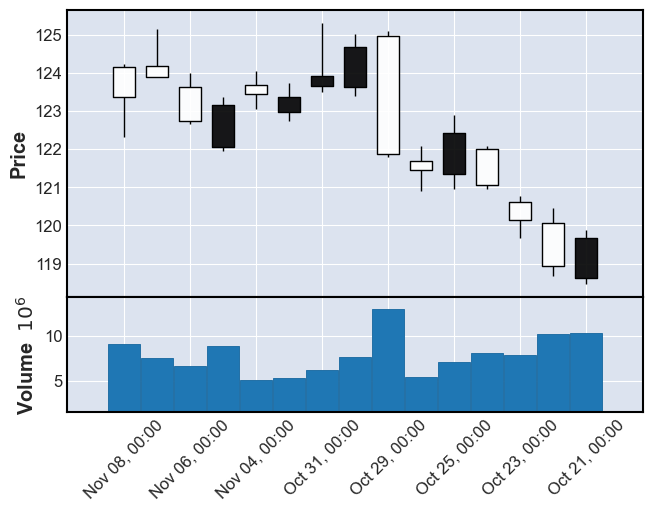

In [40]:
mpf.plot(p, type = 'candle',volume=True)

### Appendix C – Python program for price movement

[*********************100%***********************]  1 of 1 completed


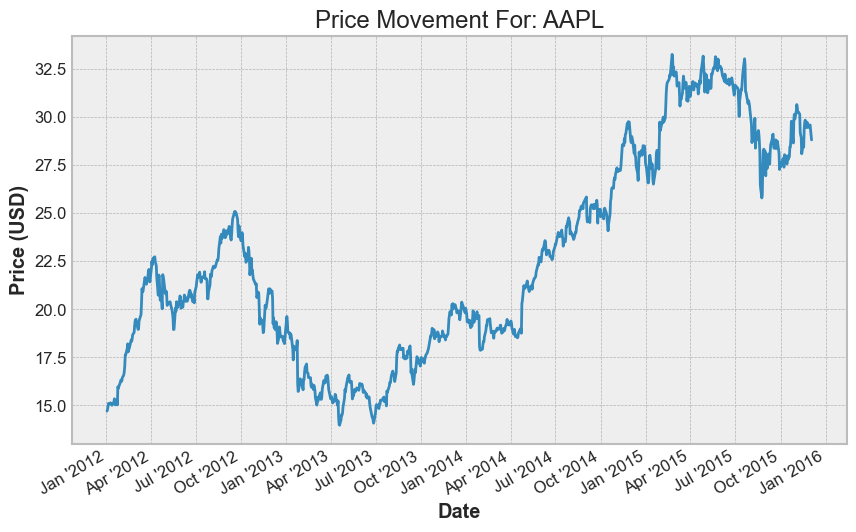

In [41]:
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

from matplotlib.dates import MonthLocator,DateFormatter
ticker= 'AAPL'
begdate= datetime.date( 2012, 1, 2 )
enddate = datetime.date( 2015, 12,4)

months= MonthLocator(range(1,13), bymonthday=1, interval=3)# 3rd month
monthsFmt = DateFormatter("%b '%Y")

x = yf.download(ticker, start=begdate, end=enddate, rounding=True)
x.head()

dates = pd.to_datetime(x.index)
closes = x.Close

plt.style.use('bmh')

fig, ax = plt.subplots(figsize = (10,6))
ax.plot_date(dates, closes, '-')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.autoscale_view()
ax.grid(True)
fig.autofmt_xdate()

ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
Title = "Price Movement For: " + ticker
ax.set_title(Title)

plt.show()

### Appendix D – Other Notes

In [42]:
ticker= 'AAPL'
# Simply playing around with downloading stock data from different periods and intervals

begdate= datetime.date( 2023, 11, 15)
enddate = datetime.date( 2023, 11, 16)

x = yf.download(ticker, start = begdate, end = enddate, period = '1d', interval = '1m')
x

[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['AAPL']: Exception('AAPL: 1m data not available for startTime=1700024400 and endTime=1700110800. The requested range must be within the last 30 days.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


## Practice Questions


Download IBM monthly data from Yahoo Finance. Estimate its standard deviation and Sharpe ratio from January 2000 to December 2004.

In [43]:
begdate = datetime.date( 2000, 1, 1)
enddate = datetime.date( 2004, 12, 31)

IBM = yf.download('IBM', start = begdate, end = enddate, interval = '1mo')
IBM.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,107.492828,119.263863,104.804016,107.313576,59.053326,183321540
2000-02-01,107.433075,114.483749,96.498566,98.231361,54.055500,139666521
2000-03-01,97.514343,122.609940,95.124283,113.169212,62.341206,203268134
2000-04-01,114.722755,122.370934,96.797325,106.596558,58.720512,176214181
2000-05-01,107.552582,108.628105,97.514343,102.593208,56.515175,129498146


In [44]:
IBM['returns'] = IBM['Adj Close'].pct_change()
std_returns = IBM['returns'].std() # volatility
IBM.head()

# monthly risk free rate.
rf = (1.02**(1/12))-1 
e_r = IBM['returns'].mean() # expected returns
sr = (e_r-rf)/std_returns # Sharpe ratio

sr

0.017377463330044314

What is the annual beta for IBM, DELL, and MSFT from 2001 to 2010?

In [45]:
# Data for the stocks, 1 year intervals
begdate = datetime.date( 2001, 1, 1)
enddate = datetime.date( 2010, 12, 31)

IBM = yf.download('IBM', start = begdate, end = enddate, interval = '1mo')
DELL = yf.download('IBM', start = begdate, end = enddate, interval = '1mo')
MSFT = yf.download('IBM', start = begdate, end = enddate, interval = '1mo')
IBM.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-01,80.783936,111.615677,80.066925,107.074570,59.196304,208114878
2001-02-01,107.456978,113.422562,94.741875,95.506691,52.800964,163635088
2001-03-01,94.933075,103.632889,83.795410,91.950287,50.892742,266259300
2001-04-01,93.164436,112.858505,86.089867,110.076485,60.925274,236616603
2001-05-01,110.755257,114.627151,106.080307,106.883362,59.157928,166686584


In [46]:
IBM['returns'] = IBM['Adj Close'].pct_change()
DELL['returns'] = DELL['Adj Close'].pct_change()
MSFT['returns'] = MSFT['Adj Close'].pct_change()

In [47]:
# Get the market data for SP&500 to calculate betas for the three stocks
SP500 = yf.download('^SPX',start = begdate, end = enddate, interval = '1mo')
SP500['returns'] = SP500['Adj Close'].pct_change()
SP500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2001-01-01,1320.280029,1383.369995,1274.619995,1366.010010,1366.010010,27829800000,NaN
2001-02-01,1366.010010,1376.380005,1215.439941,1239.939941,1239.939941,21644400000,-0.092291
2001-03-01,1239.939941,1267.420044,1081.189941,1160.329956,1160.329956,27806610000,-0.064205
2001-04-01,1160.329956,1269.300049,1091.989990,1249.459961,1249.459961,25409990000,0.076814
2001-05-01,1249.459961,1315.930054,1232.000000,1255.819946,1255.819946,24525900000,0.005090


In [48]:
# Beta = Covariance(Stock Returns, Market Returns) / Variance(Market Returns)

varM = SP500['returns'].var()
betaIBM = IBM['returns'].cov(SP500['returns']) / varM
betaDELL = DELL['returns'].cov(SP500['returns']) / varM
betaMSFT = MSFT['returns'].cov(SP500['returns']) / varM

print("IBM - market BETA: ", round(betaIBM,5))
print("DELL - market BETA: ", round(betaDELL,5))
print("MSFT - market BETA: ", round(betaMSFT,5))

# It's all very similar to one another

IBM - market BETA:  1.07425
DELL - market BETA:  1.07425
MSFT - market BETA:  1.07425


What is the correlation between IBM and DELL from 2016 to 2020?

Note: Dell has no info prior to 2016

In [49]:
begdate = datetime.date( 2016, 1, 1)
enddate = datetime.date( 2020, 12, 31)

IBM = yf.download('IBM', start = begdate, end = enddate, interval = '1mo')
DELL = yf.download('DELL', start = begdate, end = enddate, interval = '1mo')

returnsIBM = IBM['Adj Close'].pct_change()
returnsDELL = DELL['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
IBM.head()
DELL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-01,13.344604,14.281954,11.792645,13.414765,12.714956,481120510
2016-10-01,13.367055,13.962020,13.089218,13.776795,13.058099,142098724
2016-11-01,13.788021,15.070562,13.524216,15.031272,14.247133,96272632
2016-12-01,15.028466,16.179106,14.318437,15.426980,14.622198,135310400
2017-01-01,15.457850,17.680548,15.194045,17.677740,16.755545,103543063


In [51]:
# Let's compare returns and the correlation between the two
corr = returnsIBM.corr(returnsDELL)
corr
# Very different returns

0.3271766836439706

Estimate the mean weekday returns for IBM. Do you observe a weekday effect?

In [52]:
# We will use the IBM data from above
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a dummy variable for weekday
IBM['date'] = pd.to_datetime(IBM.index)
IBM['weekday'] = IBM['date'].dt.weekday
IBM.rename(columns={'Adj Close': 'Adj_Close'}, inplace = True)
IBM['returns'] = IBM.Adj_Close.pct_change()

IBM.head()


,Open,High,Low,Close,Adj_Close,Volume,date,weekday,returns
Date,,,,,,,,,
2016-01-01,129.636703,130.869980,112.810707,119.302101,82.933777,132039823,2016-01-01,4,NaN
2016-02-01,118.929253,128.986618,111.759079,125.267685,87.080818,111624727,2016-02-01,0,0.050004
2016-03-01,126.424477,146.367111,126.223709,144.789673,101.679771,110611048,2016-03-01,1,0.167648
2016-04-01,143.891006,146.768646,136.338425,139.521988,97.980469,98828695,2016-04-01,4,-0.036382
2016-05-01,140.114716,147.045883,136.615677,146.978973,103.217209,78710456,2016-05-01,6,0.053447


In [53]:
lmfit = ols('Adj_Close ~ C(weekday,Treatment(reference=0))',data=IBM).fit()
lmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.5668
Date:                Tue, 16 Jan 2024   Prob (F-statistic):              0.755
Time:                        09:15:46   Log-Likelihood:                -211.48
No. Observations:                  60   AIC:                             437.0
Df Residuals:                      53   BIC:                             451.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 102.5829      3.089     33.205      0.000      96.386     108.779
C(weekday, Treatment(reference=0))[T.1]     0.2699      4.369      0.062      0.951      -8.493       9.033
C(weekday, Treatment(reference=0))[T.2]     5.4131      4.246      1.275      0.208      -3.103      13.929
C(weekday, Treatment(reference=0))[T.3]     2.4967      4.369      0.571      0.570      -6.266      11.260
C(weekday, Treatment(reference=0))[T.4]    -0.7129      4.145     -0.172      0.864      -9.026       7.600
C(weekday, Treatment(reference=0))[T.5]     0.1860      4.369      0.043      0.966      -8.577       8.949
C(weekday, Treatment(reference=0))[T.6]     3.0320      4.246      0.714      0.478      -5.484      11.548
==============================================================================
Omnibus:                        2.726   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.303
Skew:                          -0.480   Prob(JB):                        0.316
Kurtosis:                       2.994   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0.5, 0, 'Weekdays'),
 Text(0, 0.5, 'Adjusted Close'),
 Text(0.5, 1.0, 'Weekday Effect')]

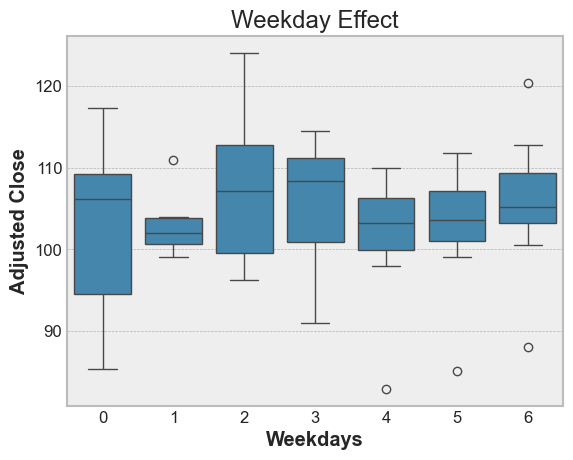

In [54]:
# seaborn provides more functionality for grouped boxplots
import seaborn as sns

sns.boxplot(data = IBM, x = 'weekday', y = 'Adj_Close').set(xlabel = "Weekdays",ylabel = "Adjusted Close", title = "Weekday Effect")


What is the correlation between S&P500 and DJI (Dow Jones Industrial
average)?Note: S&P500 Index ticker in Yahoo Finance is ^GSPC and for
DJIit's^DJI.

In [55]:
SP500 = yf.download('^GSPC', interval = '1mo', period = '5Y')
DJI = yf.download('^DJI', interval = '1mo', period = '5Y')

DJI.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,25025.310547,26241.419922,24883.039062,25916.000000,25916.000000,5434540000
2019-03-01,26019.669922,26155.980469,25208.000000,25928.679688,25928.679688,6637700000
2019-04-01,26075.099609,26695.960938,26062.589844,26592.910156,26592.910156,5854600000
2019-05-01,26639.060547,26689.390625,24809.509766,24815.039062,24815.039062,6358230000
2019-06-01,24830.160156,26907.369141,24680.570312,26599.960938,26599.960938,5544390000


In [56]:
corr = SP500['Adj Close'].corr(DJI['Adj Close'])
corr

# The two indices are closely correlated, unsurprisingly

0.9778717981772588

### Summary

In this chapter, we have discussed various public data sources for economics,
finance and accounting. For economics, we could go to Federal Reserve Bank's data
library, Prof. French's Data library to retrieve many useful time series. For finance,
we could use Yahoo!Finance and Google finance to download historical price data.
For accounting information, such as latest several years' balance sheets and income
statements, we could use Yahoo!Finance, Google finance, and SEC filings. For the
next chapter, we explain many concepts related to interest rate. After that, we explain
how to price bonds and stocks.